In [ ]:
import pandas as pd

In [2]:
meta_text = pd.read_csv('/scratch/yte9pc/InternetArchive/Datasets/Preprocessed_Data/meta_text_translated.csv', lineterminator='\n')

In [3]:
meta_text 

,filePath,fileName,numPages,format,title,author,subject,creator,producer,height,...,size,textLength,text,language,iso,structure,content,association,languageCode,label
0,/scratch/yte9pc/InternetArchive/Datasets/longt...,ddd94ef1f8a03f5c437aef75a8c968046f9adfb3.pdf,23,1,0,0,0,0,0,843,...,1507372,60643,FAKTOR-FAKTOR YANG MEMPENGARUHI PROSES PENYUSU...,Indonesian,id,3,279,66,19,1
1,/scratch/yte9pc/InternetArchive/Datasets/longt...,dddb3b2b97b1032cc8e62ff2557f3265dc93795a.pdf,19,1,0,0,0,0,0,539,...,1161094,6745,"Universidad Católica San Antonio , Octubre de ...",Spanish,es,2,26,26,37,1
2,/scratch/yte9pc/InternetArchive/Datasets/longt...,ddde02de12982cd27961b1231f50a131b6299839.pdf,8,1,1,0,1,0,0,596,...,751048,16934,"Ladányi, I. (2014). A Palicsi-tó mint kulturál...",Hungarian,hu,0,5,2,18,1
3,/scratch/yte9pc/InternetArchive/Datasets/longt...,ddded15647fcbd31bad04377cea5558e6ff47ed0.pdf,14,1,1,0,1,0,0,792,...,1454200,47262,www.tjprc.org ...,English,en,15,144,121,10,1
4,/scratch/yte9pc/InternetArchive/Datasets/longt...,dde4eec01b3c867cc6cbe641a032d94f04a29ed0.pdf,1,1,0,0,0,0,0,842,...,1503058,2484,640 J.V. ASIMAKOPOULOS et al CONTINUING MEDIC...,English,en,0,1,7,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,/scratch/yte9pc/InternetArchive/Datasets/gwb_r...,000170cb8eaabe620101ed8ece8ee8a65d57e126.pdf,40,1,0,0,0,0,0,842,...,1503058,113488,Message du directeur général Faits saillants e...,French,fr,6,132,156,13,0
59988,/scratch/yte9pc/InternetArchive/Datasets/gwb_r...,000170d20e1ceda5365ccf198ef41fb7bcf01f71.pdf,2,1,0,0,0,0,0,842,...,1503058,2296,留学生奨学金 団体名 ドコモ留学生奨学金（№０３８） 応募資格 （申込書を提出す る際は...,Japanese,ja,0,10,8,21,0
59989,/scratch/yte9pc/InternetArchive/Datasets/gwb_r...,000170d40729689c5eadb30f5722b238928eecc5.pdf,2,1,0,0,1,0,0,792,...,1454200,2833,FY 2010 COMMUNITY DEVELOPMENT PROGRAM Staff R...,English,en,0,4,0,10,0
59990,/scratch/yte9pc/InternetArchive/Datasets/gwb_r...,000170d9a4dd7b249312587997c06eec29997ad6.pdf,5,1,0,0,0,0,0,792,...,1454200,5,,NaN,NaN,0,0,0,-1,0


In [4]:
meta_text .dtypes

filePath        object
fileName        object
numPages         int64
format           int64
title            int64
author           int64
subject          int64
creator          int64
producer         int64
height           int64
width            int64
size             int64
textLength       int64
text            object
language        object
iso             object
structure        int64
content          int64
association      int64
languageCode     int64
label            int64
dtype: object

In [5]:
## import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import xgboost as xgb
import missingno as msno
from numpy import isnan
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report,accuracy_score, confusion_matrix, roc_curve, auc, f1_score
from sklearn.impute import SimpleImputer
from numpy import nan
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC

sns.set() # will create pretty matplots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#global format settigns for plots
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12
warnings.filterwarnings('ignore')
pd.set_option('precision', 3) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.3f}'.format) # get rid of scientific notation

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Function

In [ ]:
##Functions used later

## identify categorical columns
# https://pbpython.com/categorical-encoding.html
def identifyCatVar(df):
    cat_df = df.select_dtypes(include = ['object']).copy()
    cat_df.head()
    return cat_df

#Function to summarize the number of rows with missing values for each column

def summarizeMissing(df):
    missing_df = []
    columns=['Variable','Missing','Percent']
    for i in range(df.shape[1]):
        # count number of rows with missing values
        n_miss = df.iloc[:,i].isnull().sum()
        perc = n_miss / df.shape[0] * 100
        values = [i,n_miss,perc]
        zipped = zip(columns, values)
        dict_miss = dict(zipped)
        missing_df.append(dict_miss)
    return missing_df
#Function to replace NAN values with mode value
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    # replace nan values with most occured category
     DataFrame[ColName].fillna(most_frequent_category,inplace=True)


#https://stackoverflow.com/questions/56088264/trouble-training-xgboost-on-categorical-column
#Function to convert categories to strings so that XGBClassfier works
def catToString(X):
    df = identifyCatVar(X)
    lbl = preprocessing.LabelEncoder()
    for i in df.columns:
        X[i] = lbl.fit_transform(X[i].astype(str))
    return X

def callROC_Curve(y_pred_prob,y_train):
    # keep probabilities for the positive outcome only
    y_pred_prob = y_pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
    best_thresh = getoptimalThreshold(fpr,tpr,thresholds,y_pred_prob,y_train)
    plt.show()
    return best_thresh

def exploreConfusionMatrix(y_pred,y_pred_prob,y,threshold):
    threshold = float(threshold)
    #y_pred = fit.predict_proba(X)
    # keep probabilities for the positive outcome only
    y_pred_prob = y_pred_prob[:,1]
    pred = [ 0 if x < threshold else 1 for x in y_pred_prob]
    print("\nConfusion Matrix for Threshold=%.3f" %threshold+"\n")
    metrics = getClassificationMetrics(y_pred,y_pred_prob,y,threshold)
    return pd.DataFrame(metrics)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs > threshold).astype('int')

#computes optimal threshold based on f1 score. Called from CallROC_Curve
def getoptimalThreshold(fpr, tpr,thresholds, probs,y_train):
    #the function creates a f1 score for the data using al lthe thresholds
    scores_t = [f1_score(y_train, to_labels(probs, t)) for t in thresholds]
    # get index of best threshold with max score
    ix = np.argmax(scores_t)
    print('\nBest Threshold=%.3f, F-Score=%.3f' % (thresholds[ix], scores_t[ix]))
    #sets limits for axis
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    #plot the fpr and tpr for the model
    plt.plot(fpr, tpr, marker='.', label='Model')
    #plot the best threshold point
    plt.scatter(fpr[ix], tpr[ix], marker='D', color='black', label='Best')
    #set labels and legend
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    #return the best threshold based on the f1score
    return thresholds[ix]

#Mainly used to fill the final table of metrics exactly as asked and plot the confusion matrix(cm) where required
#takes the best estimator and any x and y values alogn with a threshold to compute the metrics and cm. used in exploreConfusionMatrix function
def getClassificationMetrics(y_pred, pred_prob, y_test,threshold):
    #compute predicted probabilities
    #pred_prob = fit.predict_proba(X)
    #keep probabilities for the positive outcome only
    #pred_prob = pred_prob[:,1]
    CM = confusion_matrix(y_test,y_pred)
    TN = CM[0][0]; FN = CM[1][0] ; TP = CM[1][1]; FP = CM[0][1]
    Population = TN+FN+TP+FP
    Accuracy   = round( ((TP+TN)*100) / Population,2)
    Accuracy = str(Accuracy)+'%'
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    Specificity = 1-FPR
    FDR        = round( FP / (TP+FP),4 )
    Precision  = round( TP / (TP+FP),4 )
    auc = roc_auc_score(y_test, pred_prob)
    plt.title('Confusion Matrix')
    #get values from the confusion matrix inbuilt function and use it in a seaborn plot to make it look pretty
    sns.heatmap( pd.DataFrame(CM, columns=['Predicted Negative', 'Predicted Positive'], index=['Negative', 'Positive']), annot=True, cmap='Blues',fmt="")
    plt.show()
    #store metrics in a data frame and return. This format will eb useful to plot the final table
    metrics = pd.DataFrame({
        'Metrics':['Accuracy','AUC','Threshold','Recall','Specificity','FDR', 'Precision'],'Value':[Accuracy,auc,threshold,Recall,Specificity,FDR, Precision]})
    metrics = metrics.set_index('Metrics')
    return metrics 

In [ ]:
## return datafraome for language = English or non-English
def onlyEng(df):
    df_en = df[df['language'] == 10]
    return df_en
def nonEng(df):
    df_nonEn = df[df['language'] != 10]
    return df_nonEn

## Read Dataset and Clean Dataset

In [7]:
## drop columns which are not considered for the features in the models
meta_text.drop(['filePath', 'fileName', 'format', 'iso', 'languageCode'], axis = 1, inplace = True)

In [8]:
meta_text 

,numPages,title,author,subject,creator,producer,height,width,size,textLength,text,language,structure,content,association,label
0,23,0,0,0,0,0,843,596,1507372,60643,FAKTOR-FAKTOR YANG MEMPENGARUHI PROSES PENYUSU...,Indonesian,3,279,66,1
1,19,0,0,0,0,0,539,718,1161094,6745,"Universidad Católica San Antonio , Octubre de ...",Spanish,2,26,26,1
2,8,1,0,1,0,0,596,420,751048,16934,"Ladányi, I. (2014). A Palicsi-tó mint kulturál...",Hungarian,0,5,2,1
3,14,1,0,1,0,0,792,612,1454200,47262,www.tjprc.org ...,English,15,144,121,1
4,1,0,0,0,0,0,842,595,1503058,2484,640 J.V. ASIMAKOPOULOS et al CONTINUING MEDIC...,English,0,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,40,0,0,0,0,0,842,595,1503058,113488,Message du directeur général Faits saillants e...,French,6,132,156,0
59988,2,0,0,0,0,0,842,595,1503058,2296,留学生奨学金 団体名 ドコモ留学生奨学金（№０３８） 応募資格 （申込書を提出す る際は...,Japanese,0,10,8,0
59989,2,0,0,1,0,0,792,612,1454200,2833,FY 2010 COMMUNITY DEVELOPMENT PROGRAM Staff R...,English,0,4,0,0
59990,5,0,0,0,0,0,792,612,1454200,5,,NaN,0,0,0,0


In [9]:
meta_text.drop(['text'], axis=1, inplace = True)

In [10]:
meta_text

,numPages,title,author,subject,creator,producer,height,width,size,textLength,language,structure,content,association,label
0,23,0,0,0,0,0,843,596,1507372,60643,Indonesian,3,279,66,1
1,19,0,0,0,0,0,539,718,1161094,6745,Spanish,2,26,26,1
2,8,1,0,1,0,0,596,420,751048,16934,Hungarian,0,5,2,1
3,14,1,0,1,0,0,792,612,1454200,47262,English,15,144,121,1
4,1,0,0,0,0,0,842,595,1503058,2484,English,0,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,40,0,0,0,0,0,842,595,1503058,113488,French,6,132,156,0
59988,2,0,0,0,0,0,842,595,1503058,2296,Japanese,0,10,8,0
59989,2,0,0,1,0,0,792,612,1454200,2833,English,0,4,0,0
59990,5,0,0,0,0,0,792,612,1454200,5,NaN,0,0,0,0


In [11]:
#print missing value summary 
pd.DataFrame(summarizeMissing(meta_text))

,Variable,Missing,Percent
0,0,0,0.000
1,1,0,0.000
2,2,0,0.000
3,3,0,0.000
4,4,0,0.000
...,...,...,...
10,10,4449,7.416
11,11,0,0.000
12,12,0,0.000
13,13,0,0.000


## Create dependent and undependent variables to run classificaiton with train and test data

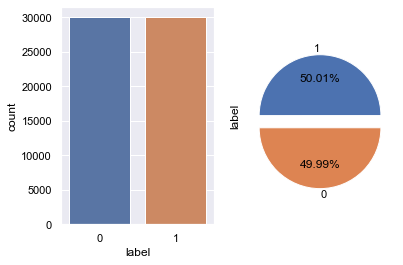

<Figure size 288x288 with 0 Axes>

In [12]:
## Checking proportion of data
fig, ax = plt.subplots(1, 2)
plt.figure(figsize = (4, 4))
sns.countplot('label', data= meta_text, ax=ax[0])
meta_text['label'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.2f%%', ax=ax[1])
fig.show()

In [13]:
final_data = meta_text

In [28]:
# create X nad Y from final dataset
final_data = catToString(final_data,)

#create X and Y
X = final_data.drop(final_data[['label']],axis=1)
Y = final_data[['label']]
#create train and test set to check accuracy, using stratify as the data is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70,stratify=Y,random_state=1)

In [29]:
# create X nad Y from final dataset
final_data = catToString(final_data,)
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

#create X and Y
X = final_data.drop(final_data[['label']],axis=1)
Y = final_data[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 1- train_ratio, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio+validation_ratio))

## XGBoost

In [30]:
# fit model on all the training data and check accuracy
model_fs = xgb.XGBClassifier(verbosity=0)
model_fs.fit(X_train, y_train);
# make predictions for test data and evaluate
pred_fs = model_fs.predict(X_test)
accuracy = accuracy_score(y_test, pred_fs)
print("\n\nAccuracy with 11 features: %.2f%%" % (accuracy * 100.0))



Accuracy with 11 features: 89.11%


In [31]:
#create a subset of data removing thsoe features with importance 0
sorted_idx = model_fs.feature_importances_.argsort()
feature_imp = pd.DataFrame(X.columns[sorted_idx], model_fs.feature_importances_[sorted_idx])
feature_imp = feature_imp.reset_index()
feature_imp.columns=['importance','features']
reduced_data = final_data[feature_imp[feature_imp["importance"] > 0].features.values.tolist()]

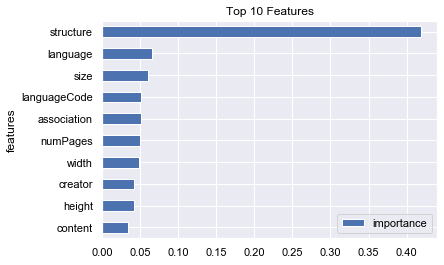

In [32]:
#Top 11 features
feature_imp= feature_imp.set_index('features')
feature_imp.tail(10).plot.barh(title='Top 10 Features');

In [25]:
# change categorical variables to strings in the reduced dataset
reduced_data = catToString(reduced_data)

In [26]:
#create new training and test data with reduced data and check accuracy
X_train_rd, X_test_rd, y_train, y_test = train_test_split(reduced_data, Y, train_size = 0.70, stratify = Y, random_state = 1)
model_rd = xgb.XGBClassifier(verbosity = 0)
model_rd.fit(X_train_rd, y_train)
#make predictions for test data and evaluate
pred_rd = model_rd.predict(X_test_rd)
accuracy_rd = accuracy_score(y_test, pred_rd)
print("\n\nAccuracy with selected selected features: %.2f%%" % (accuracy_rd * 100.0))



Accuracy with selected selected features: 90.34%


## Hyper parameter tuning for XGBoost

In [28]:
# performing on 3 splits in interest of time
kfold = StratifiedKFold(n_splits=3, random_state=1,shuffle=True)
# Create a pipeline
pipe = Pipeline([
('scaler', StandardScaler()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic',verbosity=0))
])
search_space = [
  {
    'clf__n_estimators': [150,200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)]
  }
]
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC'
)
# Fit grid search
model = grid.fit(X_train_rd, y_train)

## ROC and AUC based on model

Best Params:  {'clf__colsample_bytree': 0.2, 'clf__gamma': 0.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__n_estimators': 200}

Best Threshold=0.498, F-Score=0.925


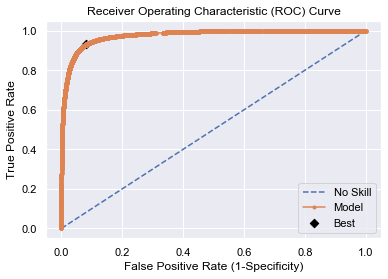


Confusion Matrix for Threshold=0.498



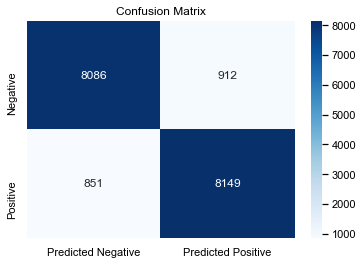

,Value
Metrics,
Accuracy,90.2%
AUC,0.964
Threshold,0.498
Recall,0.905
Specificity,0.899
FDR,0.101
Precision,0.899


In [29]:
#predict using the best model
#focusing on accuracy and default threshold
print('Best Params: ', model.best_params_)
##ROC Curve
#find best threshold to use on test dataset
#finding threshold on training data takes a long time
predict = model.predict(X_test_rd)
y_pred_tr = model.predict_proba(X_train_rd)
thresh = callROC_Curve(y_pred_tr,y_train)
#use threshold now on test set to get metrics
y_pred_prob_test = model.predict_proba(X_test_rd)
exploreConfusionMatrix(predict, y_pred_prob_test,y_test,thresh)

## ROC and AUC based on non-grid search model


Best Threshold=0.507, F-Score=0.933


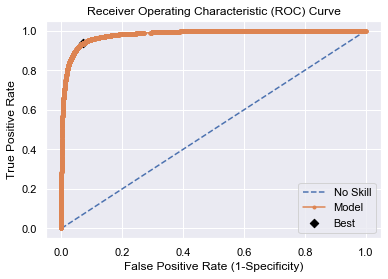


Confusion Matrix for Threshold=0.507



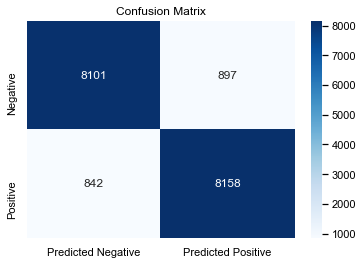

,Value
Metrics,
Accuracy,90.34%
AUC,0.963
Threshold,0.507
Recall,0.906
Specificity,0.900
FDR,0.099
Precision,0.901


In [30]:
#predict using the best model
#focusing on accuracy and default threshold
# print('Best Params: ', model_rd.best_params_)
##ROC Curve
#find best threshold to use on test dataset
#finding threshold on training data takes a long time
predict = model_rd.predict(X_test_rd)
y_pred_tr = model_rd.predict_proba(X_train_rd)
thresh = callROC_Curve(y_pred_tr,y_train)
#use threshold now on test set to get metrics
y_pred_prob_test = model_rd.predict_proba(X_test_rd)
exploreConfusionMatrix(predict, y_pred_prob_test,y_test,thresh)

## Keras

In [31]:
# neural network with keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70,stratify=Y,random_state=1)

In [33]:
X_train

,numPages,title,author,subject,creator,producer,height,width,size,textLength,language,structure,content,association,languageCode
8868,2,0,0,0,0,0,794,596,1419760,5113,10,2,10,8,10
1269,5,0,0,1,0,0,828,609,1512844,27561,10,4,20,63,10
20978,4,0,1,1,0,0,791,596,1414396,12063,10,3,11,9,10
37389,3,1,0,1,0,0,792,612,1454200,7438,10,0,18,10,10
56652,24,0,0,1,0,0,792,612,1454200,114148,10,3,121,177,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,11,1,0,1,0,0,792,612,1454200,51836,10,5,208,22,10
50662,13,1,0,1,0,0,842,596,1505584,23423,19,3,84,69,19
51122,10,1,0,1,0,0,842,596,1505584,26823,10,4,78,56,10
14414,1,0,0,1,0,0,792,612,1454200,715,10,0,2,0,10


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [35]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model = Sequential()

model.add(Dense(2048, activation='relu', input_shape=(15,)))
model.add(Dense(1024, activation='relu', ))
opt = keras.optimizers.Adam(learning_rate = 0.001)

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=1)

Epoch 1/100
41994/41994 [==============================] - 161s 4ms/step - loss: 0.4106 - accuracy: 0.8340
Epoch 2/100
41994/41994 [==============================] - 161s 4ms/step - loss: 0.3561 - accuracy: 0.8596
Epoch 3/100
41994/41994 [==============================] - 160s 4ms/step - loss: 0.3404 - accuracy: 0.8675
Epoch 4/100
41994/41994 [==============================] - 158s 4ms/step - loss: 0.3368 - accuracy: 0.8728
Epoch 5/100
41994/41994 [==============================] - 160s 4ms/step - loss: 0.3267 - accuracy: 0.8735
Epoch 6/100
41994/41994 [==============================] - 160s 4ms/step - loss: 0.3269 - accuracy: 0.8773
Epoch 7/100
41994/41994 [==============================] - 160s 4ms/step - loss: 0.3254 - accuracy: 0.8763
Epoch 8/100
41994/41994 [==============================] - 162s 4ms/step - loss: 0.3181 - accuracy: 0.8766
Epoch 9/100
41994/41994 [==============================] - 153s 4ms/step - loss: 0.3228 - accuracy: 0.8776
Epoch 10/100
41994/41994 [===========

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=1)

## Logistic Regression 

In [41]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [39]:
# Evaluate using a train and a test set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 79.24%


## K fold

In [43]:
kfold = model_selection.KFold(n_splits=5, random_state=42)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 77.04%


## Bayesian Model Averaging

In [44]:
df = final_data

In [45]:
df

,numPages,title,author,subject,creator,producer,height,width,size,textLength,language,structure,content,association,languageCode,label
0,23,0,0,0,0,0,843,596,1507372,60643,19,3,279,66,19,1
1,19,0,0,0,0,0,539,718,1161094,6745,37,2,26,26,37,1
2,8,1,0,1,0,0,596,420,751048,16934,18,0,5,2,18,1
3,14,1,0,1,0,0,792,612,1454200,47262,10,15,144,121,10,1
4,1,0,0,0,0,0,842,595,1503058,2484,10,0,1,7,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,40,0,0,0,0,0,842,595,1503058,113488,13,6,132,156,13,0
59988,2,0,0,0,0,0,842,595,1503058,2296,21,0,10,8,21,0
59989,2,0,0,1,0,0,792,612,1454200,2833,10,0,4,0,10,0
59990,5,0,0,0,0,0,792,612,1454200,5,48,0,0,0,-1,0


In [46]:
## normalization
# Standardize the data (mean for each numerical variable of zero, standard deviation of one.)
for key in df.keys()[0:9]:
    try:
        print("Standardizing "+key+".")
        df[key] = df[key] - np.mean(df[key])
        df[key] = df[key] / np.std(df[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
df.describe()

Standardizing numPages.
Standardizing title.
Standardizing author.
Standardizing subject.
Standardizing creator.
Standardizing producer.
Standardizing height.
Standardizing width.
Standardizing size.


,numPages,title,author,subject,creator,producer,height,width,size,textLength,language,structure,content,association,languageCode,label
count,"59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000","59,992.000"
mean,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,"27,122.202",17.809,4.124,48.286,20.416,14.175,0.500
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,"84,004.959",12.621,16.459,130.718,62.072,10.233,0.500
min,-0.233,-0.760,-0.893,-2.075,-0.467,-0.222,-4.238,-3.644,-0.927,0.000,0.000,0.000,0.000,0.000,-1.000,0.000
25%,-0.178,-0.760,-0.893,0.482,-0.467,-0.222,-0.034,-0.072,-0.040,"2,709.000",10.000,0.000,1.000,0.000,10.000,0.000
50%,-0.122,-0.760,-0.893,0.482,-0.467,-0.222,-0.023,-0.066,-0.039,"12,508.500",10.000,1.000,12.000,6.000,10.000,1.000
75%,-0.012,1.316,1.120,0.482,-0.467,-0.222,0.231,0.030,-0.008,"30,340.250",22.000,4.000,54.250,21.000,18.000,1.000
max,184.293,1.316,1.120,0.482,2.144,4.514,49.734,41.539,139.517,"8,415,268.000",48.000,"1,300.000","10,006.000","5,587.000",47.000,1.000


In [47]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [48]:
import pandas as pd
import numpy as np
import pprint
import PyPDF2
import pdfminer
import pymc3 as pm
import os
import glob
import random
from langdetect import detect
from langdetect import detect_langs

In [49]:
X = df[["numPages", "title", "author", "subject", "creator", "producer", "height", "width", "size", "textLength", "language", "structure", "content", "association"]]
y = df["label"]
# building the model and fitting the data 
log_reg = sm.Logit(y, add_constant(X)).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.575807
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                59992
Model:                          Logit   Df Residuals:                    59977
Method:                           MLE   Df Model:                           14
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.1693
Time:                        13:45:54   Log-Likelihood:                -34544.
converged:                       True   LL-Null:                       -41583.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7073      0.024    -29.666      0.000      -0.754      -0.661
numPages       -1.8256      0.066    -27.706      0.000      -1.955      -1.696
title           0.1770      0.011     15.805      0.000       0.155       0.199
author          0.0449      0.012      3.889      0.000       0.022       0.068
subject        -0.1691      0.010    -16.839      0.000      -0.189      -0.149
creator         0.0002      0.010      0.019      0.985      -0.020       0.021
producer       -0.3145      0.012    -25.412      0.000      -0.339      -0.290
height          0.6348      0.029     21.949      0.000       0.578       0.691
width          -0.9208      0.028    -32.645      0.000      -0.976      -0.866
size           -0.5519      0.076     -7.269      0.000      -0.701      -0.403
textLength   3.547e-07   6.06e-07      0.585      0.558   -8.33e-07    1.54e-06
language       -0.0108      0.001    -13.675      0.000      -0.012      -0.009
structure       0.0646      0.003     25.222      0.000       0.060       0.070
content         0.0133      0.000     47.556      0.000       0.013       0.014
association     0.0031      0.000      7.891      0.000       0.002       0.004
===============================================================================
"""

In [51]:
## BMA 
from mpmath import mp
mp.dps = 50
class BMA:
    
    def __init__(self, y, X, **kwargs):
        # Setup the basic variables.
        self.y = y
        self.X = X
        self.names = list(X.columns)
        self.nRows, self.nCols = np.shape(X)
        self.likelihoods = mp.zeros(self.nCols,1)
        self.likelihoods_all = {}
        self.coefficients_mp = mp.zeros(self.nCols,1)
        self.coefficients = np.zeros(self.nCols)
        self.probabilities = np.zeros(self.nCols)
        # Check the max model size. (Max number of predictor variables to use in a model.)
        # This can be used to reduce the runtime but not doing an exhaustive sampling.
        if 'MaxVars' in kwargs.keys():
            self.MaxVars = kwargs['MaxVars']
        else:
            self.MaxVars = self.nCols  
        # Prepare the priors if they are provided.
        # The priors are provided for the individual regressor variables.
        # The prior for a model is the product of the priors on the variables in the model.
        if 'Priors' in kwargs.keys():
            if np.size(kwargs['Priors']) == self.nCols:
                self.Priors = kwargs['Priors']
            else:
                print("WARNING: Provided priors error.  Using equal priors instead.")
                print("The priors should be a numpy array of length equal tot he number of regressor variables.")
                self.Priors = np.ones(self.nCols)  
        else:
            self.Priors = np.ones(self.nCols)  
        if 'Verbose' in kwargs.keys():
            self.Verbose = kwargs['Verbose'] 
        else:
            self.Verbose = False 
        if 'RegType' in kwargs.keys():
            self.RegType = kwargs['RegType'] 
        else:
            self.RegType = 'LS' 
        
    def fit(self):
        # Perform the Bayesian Model Averaging
        
        # Initialize the sum of the likelihoods for all the models to zero.  
        # This will be the 'normalization' denominator in Bayes Theorem.
        likelighood_sum = 0
        
        # To facilitate iterating through all possible models, we start by iterating thorugh
        # the number of elements in the model.  
        max_likelihood = 0
        for num_elements in range(1,self.MaxVars+1): 
            
            if self.Verbose == True:
                print("Computing BMA for models of size: ", num_elements)
            
            # Make a list of all index sets of models of this size.
            Models_next = list(combinations(list(range(self.nCols)), num_elements)) 
             
            # Occam's window - compute the candidate models to use for the next iteration
            # Models_previous: the set of models from the previous iteration that satisfy (likelihhod > max_likelihhod/20)
            # Models_next:     the set of candidate models for the next iteration
            # Models_current:  the set of models from Models_next that can be consturcted by adding one new variable
            #                    to a model from Models_previous
            if num_elements == 1:
                Models_current = Models_next
                Models_previous = []
            else:
                idx_keep = np.zeros(len(Models_next))
                for M_new,idx in zip(Models_next,range(len(Models_next))):
                    for M_good in Models_previous:
                        if(all(x in M_new for x in M_good)):
                            idx_keep[idx] = 1
                            break
                        else:
                            pass
                Models_current = np.asarray(Models_next)[np.where(idx_keep==1)].tolist()
                Models_previous = []
                        
            
            # Iterate through all possible models of the given size.
            for model_index_set in Models_current:
                
                # Compute the linear regression for this given model. 
                model_X = self.X.iloc[:,list(model_index_set)]
                if self.RegType == 'Logit':
                    model_regr = sm.Logit(self.y, model_X).fit(disp=0)
                else:
                    model_regr = OLS(self.y, model_X).fit()
                
                # Compute the likelihood (times the prior) for the model. 
                model_likelihood = mp.exp(-model_regr.bic/2)*np.prod(self.Priors[list(model_index_set)])
                    
                if (model_likelihood > max_likelihood/20):
                    if self.Verbose == True:
                        print("Model Variables:",model_index_set,"likelihood=",model_likelihood)
                    self.likelihoods_all[str(model_index_set)] = model_likelihood
                    
                    # Add this likelihood to the running tally of likelihoods.
                    likelighood_sum = mp.fadd(likelighood_sum, model_likelihood)

                    # Add this likelihood (times the priors) to the running tally
                    # of likelihoods for each variable in the model.
                    for idx, i in zip(model_index_set, range(num_elements)):
                        self.likelihoods[idx] = mp.fadd(self.likelihoods[idx], model_likelihood, prec=1000)
                        self.coefficients_mp[idx] = mp.fadd(self.coefficients_mp[idx], model_regr.params[i]*model_likelihood, prec=1000)
                    Models_previous.append(model_index_set) # add this model to the list of good models
                    max_likelihood = np.max([max_likelihood,model_likelihood]) # get the new max likelihood if it is this model
                else:
                    if self.Verbose == True:
                        print("Model Variables:",model_index_set,"rejected by Occam's window")
                    

        # Divide by the denominator in Bayes theorem to normalize the probabilities 
        # sum to one.
        self.likelighood_sum = likelighood_sum
        for idx in range(self.nCols):
            self.probabilities[idx] = mp.fdiv(self.likelihoods[idx],likelighood_sum, prec=1000)
            self.coefficients[idx] = mp.fdiv(self.coefficients_mp[idx],likelighood_sum, prec=1000)
        
        # Return the new BMA object as an output.
        return self
    
    def predict(self, data):
        data = np.asarray(data)
        if self.RegType == 'Logit':
            try:
                result = 1/(1+np.exp(-1*np.dot(self.coefficients,data)))
            except:
                result = 1/(1+np.exp(-1*np.dot(self.coefficients,data.T)))
        else:
            try:
                result = np.dot(self.coefficients,data)
            except:
                result = np.dot(self.coefficients,data.T)
        
        return result  
        
    def summary(self):
        # Return the BMA results as a data frame for easy viewing.
        df = pd.DataFrame([self.names, list(self.probabilities), list(self.coefficients)], 
             ["Variable Name", "Probability", "Avg. Coefficient"]).T
        return df  

In [52]:
X = df[["numPages", "title", "author", "subject", "creator", "producer", "height", "width", "size", "textLength", "language", "structure", "content", "association"]]
y = df["label"]
result = BMA(y ,add_constant(X), RegType = 'Logit', Verbose=True).fit()

Computing BMA for models of size:  1
Model Variables: (0,) likelihood= 1.6583840446569224964741639152433998315897620824819e-18062
Model Variables: (1,) likelihood= 1.1719021998588814085530919641031101205179652641444e-18046
Model Variables: (2,) rejected by Occam's window
Model Variables: (3,) rejected by Occam's window
Model Variables: (4,) likelihood= 1.5038396784052276619525863056784848521934115622264e-17969
Model Variables: (5,) rejected by Occam's window
Model Variables: (6,) likelihood= 5.9085174557811969412756983118052605688363296575703e-17855
Model Variables: (7,) rejected by Occam's window
Model Variables: (8,) likelihood= 3.9421092553365167432610257145071775560773799885463e-17765
Model Variables: (9,) rejected by Occam's window
Model Variables: (10,) rejected by Occam's window
Model Variables: (11,) rejected by Occam's window
Model Variables: (12,) likelihood= 1.3059826226795787469148671386101671684230603874354e-17276
Model Variables: (13,) likelihood= 1.9747328203569537571125

In [53]:
result.summary() 

,Variable Name,Probability,Avg. Coefficient
0,const,1.000,-0.701
1,numPages,1.000,-1.797
2,title,1.000,0.178
3,author,0.953,0.043
4,subject,1.000,-0.169
...,...,...,...
10,textLength,0.000,0.000
11,language,1.000,-0.011
12,structure,1.000,0.065
13,content,1.000,0.013


In [54]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [ ]:
# Model Variables: [0, 1, 2, 6, 8, 13] likelihood= 8.2631596469568766557745146769392760620033880591903e-15571
X = df[["numPages", "title", "author", "subject", "creator", "producer", "height", "width", "size", "textLength", "language", "structure", "content", "association"]]
y = df["label"]

In [58]:
## size is reserve word for BMA, rename this column to dimension
df = df.rename(columns = {'size' : 'dimension'})

In [ ]:
## advi method
with pm.Model() as model:
    pm.glm.GLM.from_formula('df.label ~ df.numPages + df.title + df.productor +  df.width + df.content',
                            df,
                            family=pm.glm.families.Binomial())
    trace = pm.sample(500, tune=500, init='adapt_diag')

In [ ]:
az.plot_trace(trace)